In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
original = pd.read_excel('/content/drive/MyDrive/HASOC_2021/Urdu-Fake-news-detection-FIRE2021-main/Orignal_labels.xlsx')

In [ ]:
original

,File No,Real/Fake
0,1,R
1,2,R
2,3,R
3,4,R
4,5,R
...,...,...
295,296,R
296,297,R
297,298,R
298,299,R


In [ ]:
original_label = original['Real/Fake']

In [ ]:
original_label.value_counts()

R    200
F    100
Name: Real/Fake, dtype: int64

In [ ]:
from sklearn import preprocessing
import numpy as np

from keras.utils.np_utils import to_categorical

le = preprocessing.LabelEncoder()

le.fit(original['Real/Fake'])
print(le.classes_)

original_indexed = le.transform(original['Real/Fake'])

original_label_cat = to_categorical(np.asarray(original_indexed))

['F' 'R']


In [ ]:
prediction_anu = pd.read_csv('/content/drive/MyDrive/HASOC_2021/Urdu-Fake-news-detection-FIRE2021-main/SUBMISSION_3_Majority_LR_DT_ADD_Majority_char_TFIDF_1-3_20000_URDU_88.csv', sep = ',')

In [ ]:
prediction_anu

,file number,Label1
0,106,R
1,227,R
2,49,R
3,206,R
4,18,R
...,...,...
295,291,R
296,290,R
297,292,R
298,293,R


In [ ]:
prediction_anu_sorted = prediction_anu.sort_values(by=['file number'])

In [ ]:
prediction_anu_sorted

,file number,Label1
201,1,R
133,2,R
90,3,R
263,4,R
159,5,R
...,...,...
72,296,R
70,297,R
123,298,R
17,299,R


In [ ]:
prediction_anu_label = prediction_anu_sorted['Label1']

In [ ]:
prediction_anu_label

201    R
133    R
90     R
263    R
159    R
      ..
72     R
70     R
123    R
17     R
84     R
Name: Label1, Length: 300, dtype: object

In [ ]:

anu_indexed = le.transform(prediction_anu_sorted['Label1'])

anu_indexed_cat = to_categorical(np.asarray(anu_indexed))

In [ ]:
anu_indexed_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(original_label_cat,anu_indexed_cat, target_names=le.classes_))

              precision    recall  f1-score   support

           F       0.87      0.13      0.23       100
           R       0.69      0.99      0.82       200

   micro avg       0.70      0.70      0.70       300
   macro avg       0.78      0.56      0.52       300
weighted avg       0.75      0.70      0.62       300
 samples avg       0.70      0.70      0.70       300



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(original_label_cat,anu_indexed_cat)

0.7033333333333334

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = le.classes_
    for i,c in zip(range(n_classes),classes_list1):
        plt.plot(fpr[i], tpr[i], lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()

    # Plot of a ROC curve for a specific class
    '''
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    '''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


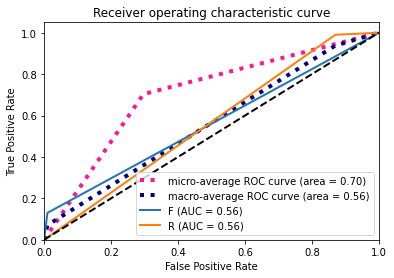

In [ ]:
plot_AUC_ROC(original_label_cat,anu_indexed_cat)
plt.savefig("/content/drive/MyDrive/HASOC_2021/Urdu-Fake-news-detection-FIRE2021-main/ROC_Majority_LR_DT_Add_sub3.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.13 0.87]
 [0.01 0.99]]


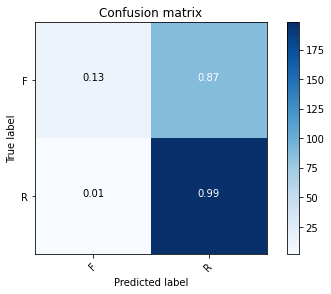

In [ ]:
from sklearn import metrics
plt.clf()
cnf_matrix = metrics.confusion_matrix(original_label_cat.argmax(axis =1),anu_indexed_cat.argmax(axis =1))
plot_confusion_matrix(cnf_matrix,classes = le.classes_, normalize = True)
plt.savefig("/content/drive/MyDrive/HASOC_2021/Urdu-Fake-news-detection-FIRE2021-main/CONFUSION_Majority_LR_DT_ADD_sub3.pdf", format = 'pdf', dpi =1000, bbox_inches = 'tight')

